Introduction to TMS and Motor Thresholds (Remy Cohan; CohanR.Github.io)

As discussed earlier and you saw in the video, in TMS research, we often measure motor thresholds (MTs) using single-pulse TMS to primary motor cortex (M1). The resting motor threshold (rMT) is defined as the minimum TMS intensity that produces an electromyographic (EMG) response of 50 µV in a relaxed muscle. MTs are an important measure because they can reflect changes in neural excitability and plasticity.

On the other hand, repetitive TMS (rTMS) is a different technique where multiple pulses are delivered in patterns (e.g., 1 Hz, 10 Hz, or theta burst stimulation). rTMS is gaining popularity as a potential treatment for neuropsychiatric conditions and in neurorehabilitation.

To study the effects of rTMS, we can measure MTs using single-pulse TMS before and after an rTMS protocol. This allows us to see how the rTMS protocol changes neural activity in a specific brain area, which is critical when designing treatments.

Remember the distinction:

Single-pulse TMS: Measures MTs and neural excitability in primary motor cortex (M1).
    
Repetitive TMS (rTMS): Modulates neural activity to induce plasticity.
    
This background should help you interpret the data and answer the following questions.

Question 1: Data Inspection

How many pre- and post data points are present in the dataset? Are there any missing values? (use pandas: import pandas as pd)

To answer this, load the dataset and count the number of available data points for the pre_rMT and post_rMT columns.

In [1]:
import pandas as pd

# load the dataset
data = pd.read_csv('/Users/rcohan/Downloads/tms_data_Remy.csv')

# count and print the number of pre- and post-data points
pre_count = data['pre_rMT'].notna().sum()
post_count = data['post_rMT'].notna().sum()

print(f"Number of Pre rMT data points: {pre_count}")
print(f"Number of Post rMT data points: {post_count}")


Number of Pre rMT data points: 60
Number of Post rMT data points: 60


Question 2: Participant Demographics

What are the demographic statistics of the participants? Specifically:

How many males and females are there in the dataset?

What are the mean and standard deviation of age, pre-rMT, and post-rMT values?

In [2]:
# count males and females
sex_counts = data['sex'].value_counts()
print("Count of participants by sex:")
print(sex_counts)

# calculate baseline mean and standard deviation of age
age_stats = data['age'].agg(['mean', 'std'])
print("Mean and Standard Deviation for Age (Baseline):")
print(age_stats)

# calculate mean and standard deviation for each condition (pre/post sham and active TMS)
stats_summary = data.groupby('condition')[['pre_rMT', 'post_rMT']].agg(['mean', 'std'])
print("Mean and Standard Deviation for Pre MTs, and Post MTs by Condition:")
print(stats_summary)


Count of participants by sex:
sex
M    30
F    30
Name: count, dtype: int64
Mean and Standard Deviation for Age (Baseline):
mean    41.20000
std     12.90224
Name: age, dtype: float64
Mean and Standard Deviation for Pre MTs, and Post MTs by Condition:
             pre_rMT             post_rMT          
                mean       std       mean       std
condition                                          
A          60.933333  7.196423  67.733333  7.999713
S          60.933333  7.196423  61.000000  7.273002


Question 3: Pre vs post rMT values by Condition

How do the pre- and post-rMT values compare between the active and sham conditions?

Create a plot to visualise the differences between the two conditions. ( use seaborn or matplotlib, or both. e'g., import matplotlib.pyplot as plt
import seaborn as sns)

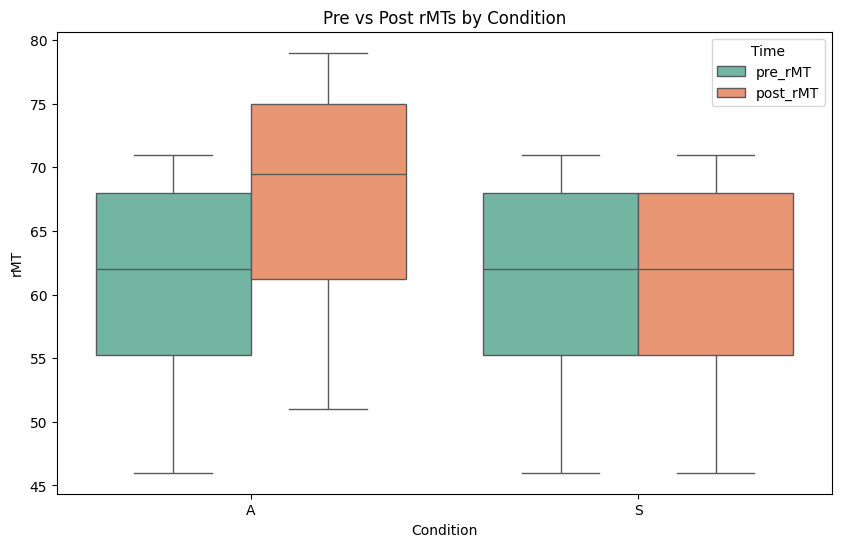

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# prepare data for plotting
tms_data = pd.melt(
    data, id_vars=['participant_id', 'condition'],
    value_vars=['pre_rMT', 'post_rMT'],
    var_name='time', value_name='rMT'
)

# plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='rMT', hue='time', data=tms_data, palette='Set2')
plt.title("Pre vs Post rMTs by Condition")
plt.xlabel("Condition")
plt.ylabel("rMT")
plt.legend(title="Time")
plt.show()


Question 4: Individual Pre vs Post trends by Condition

What are the individual participant trends for pre- and post-rMT values in the active and sham conditions?

Create a plot where:

Active participants are shown on the left.
    
Sham participants are shown on the right.

Each participant's pre- and post-rMT values are connected with a line, and dots represent individual data points. This type of visualisation is important to assess individual variability!

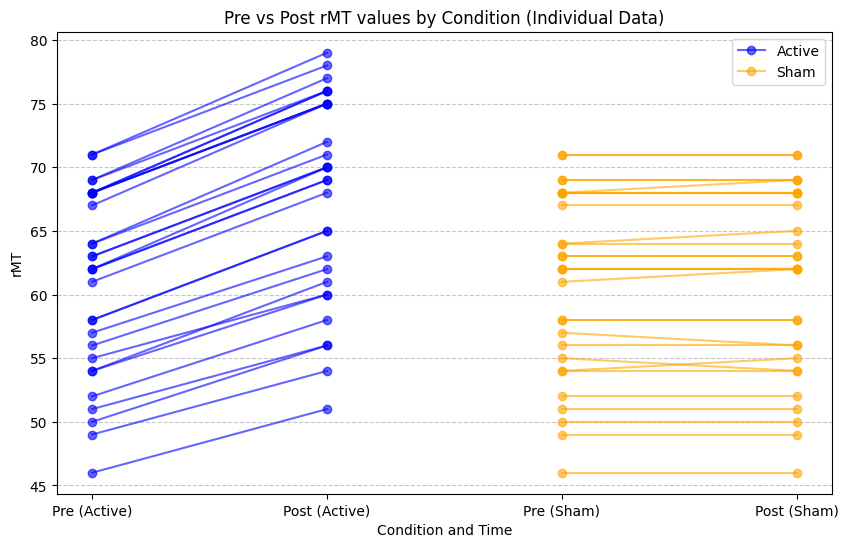

In [5]:
# prepare data for plotting
plt.figure(figsize=(10, 6))

# plot individual lines for active condition
active_data = data[data['condition'] == 'A']
for participant in active_data['participant_id'].unique():
    participant_data = active_data[active_data['participant_id'] == participant]
    plt.plot(
        [0, 1],  # x-coordinates for Pre and Post
        [participant_data['pre_rMT'].values[0], participant_data['post_rMT'].values[0]],
        marker='o', color='blue', alpha=0.6, label='Active' if participant == active_data['participant_id'].unique()[0] else ""
    )

# plot individual lines for Sham condition
sham_data = data[data['condition'] == 'S']
for participant in sham_data['participant_id'].unique():
    participant_data = sham_data[sham_data['participant_id'] == participant]
    plt.plot(
        [2, 3],  # x-coordinates for Pre and Post, to make things look organised! 
        [participant_data['pre_rMT'].values[0], participant_data['post_rMT'].values[0]],
        marker='o', color='orange', alpha=0.6, label='Sham' if participant == sham_data['participant_id'].unique()[0] else ""
    )

# customise and beautify!
plt.xticks([0, 1, 2, 3], ['Pre (Active)', 'Post (Active)', 'Pre (Sham)', 'Post (Sham)'])
plt.title("Pre vs Post rMT values by Condition (Individual Data)")
plt.ylabel("rMT")
plt.xlabel("Condition and Time")
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Question 5: Correlation between Age and baseline rMT 

Is there a correlation between participants' age and their pre-rMT values?

To answer this (use scipy, for example: from scipy.stats import pearsonr)
    
Create a scatterplot with a regression line (aka line of best fit) to visualise the relationship.

Optional: Calculate the Pearson correlation coefficient and the p-value.

Correlation between Age and Pre rMT: r = 0.94, p = 0.0000


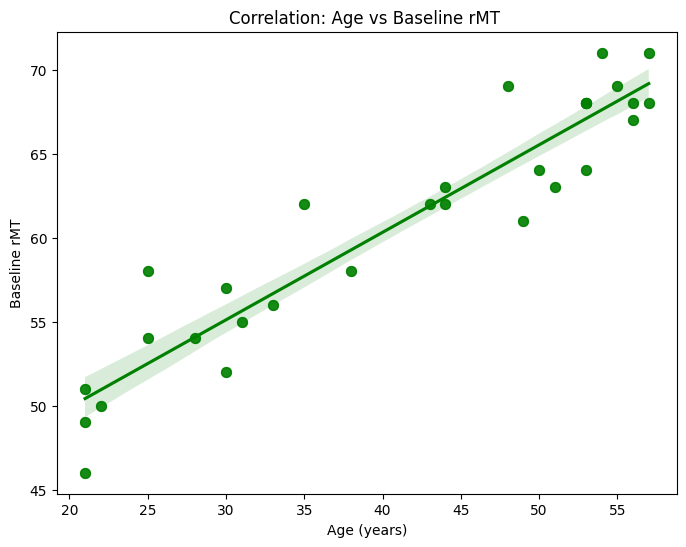

In [7]:
from scipy.stats import pearsonr

# correlation plot for age vs pre rMTs
corr, pval = pearsonr(data['age'], data['pre_rMT'])
print(f"Correlation between Age and Pre rMT: r = {corr:.2f}, p = {pval:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='pre_rMT', data=data, scatter_kws={'s': 50, 'alpha': 0.7}, color='green')
plt.title("Correlation: Age vs Baseline rMT ")
plt.xlabel("Age (years)")
plt.ylabel("Baseline rMT")
plt.show()


Question 6: Interpretation

Without performing any statistics, just by inspecting the plots and mean values:

Based on the mean pre- to post-rMT values for Active TMS vs Sham TMS, what conclusion would you draw?

What does the correlation plot of age and pre-rMT values (baseline MTs) tell us? 

Answer Key: Question 6

Mean Pre- to Post-rMT Values:
Based on the plots, it seems like Active TMS increased rMTs from pre to post, while Sham did not. Additionally, the individual data shows that the effects are fairly consistent across participants, with increased rMTs in the Active condition but flat responses in the Sham condition.

Correlation Between Age and Pre-rMT values:
The correlation plot suggests that, at baseline, older individuals may have higher threshold values. While this does not necessarily affect the effects of rTMS on thresholds, it indicates that older individuals may require higher stimulation intensity (dose). 

